# Lab5
_Similaty measures_

# Exercise 1
For the given sentences, apply confusion_report
to get similarity between sentences. Write your code below
and the outputs. 


In [3]:
from __future__ import print_function
from nltk.metrics import *
Sentence1= 'There are many similarity measures used in NLTK package'.split()
Sentence2 = 'There are many similarity measures are available in NLTK'.split()
print(accuracy(Sentence1,Sentence2))
print(Sentence1)

0.5555555555555556
['There', 'are', 'many', 'similarity', 'measures', 'used', 'in', 'NLTK', 'package']


In [4]:
#How many ones and zeros
print(precision(set(Sentence1),set(Sentence2)))

0.875


In [5]:
print(recall(set(Sentence1),set(Sentence2)))

0.7777777777777778


# Exercise 2
In NLP, the standard scores retrieved from information retrieval can be Accuracy,
Recall, Precision, and F-score. To apply them on the sentences above, do the following: 


In [ ]:
pip install sklearn

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Sentence1,Sentence2))

              precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   available       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        many       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
     package       0.00      0.00      0.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



C:\Users\Ibrahim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ibrahim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ibrahim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [ ]:
pip install seaborn

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

<AxesSubplot:>

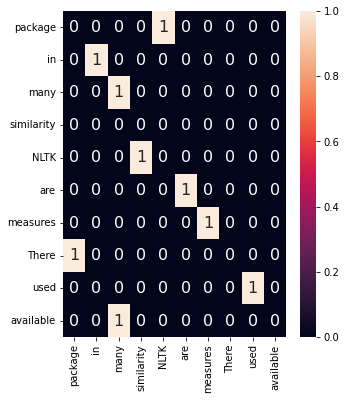

In [14]:
array = confusion_matrix(Sentence1,Sentence2)
setA = set(Sentence1)
setB = set(Sentence2)

dictionary = setA.union(setB)
df_cm = pd.DataFrame(array,index= dictionary,columns=dictionary) 

plt.figure(figsize = (5,6))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [15]:
from __future__ import print_function
def _edit_dist_init(len1, len2):
  lev = []
  for i in range(len1):
    lev.append([0] * len2) # initialize 2D array to zero
  for i in range(len1):
    lev[i][0] = i # column 0: 0,1,2,3,4,...
  for j in range(len2):
    lev[0][j] = j # row 0: 0,1,2,3,4,...
  return lev

def _edit_dist_step(lev,i,j,s1,s2,transpositions=False):
  c1 =s1[i-1]
  c2 =s2[j-1]
   # skipping a character in s1
  a =lev[i-1][j] +1
  # skipping a character in s2
  b =lev[i][j -1]+1
  # substitution
  c =lev[i-1][j-1]+(c1!=c2)
  # transposition
  d =c+1 # never picked by default
  if transpositions and i>1 and j>1:
    if s1[i -2]==c2 and s2[j -2]==c1:
      d =lev[i-2][j-2]+1
      # pick the cheapest
    lev[i][j] =min(a,b,c,d)


def edit_distance(s1, s2, transpositions=False):
  # set up a 2-D array
  len1 = len(s1)
  len2 = len(s2)
  lev = _edit_dist_init(len1 + 1, len2 + 1)
  # iterate over the array
  for i in range(len1):
    for j in range(len2):
      _edit_dist_step(lev, i + 1, j + 1, s1, s2,transpositions=transpositions)
  return lev[len1][len2]

edit_distance("relate","relation")

0